In [1]:
import random
from optimization import utility
import matplotlib.pyplot as plt
from lib import measure_time

Iterations:  9801
Elapsed time:  0.011406183242797852
global maximum 2.4 (10, 1)
global minimum -1063.368 (99, 99)


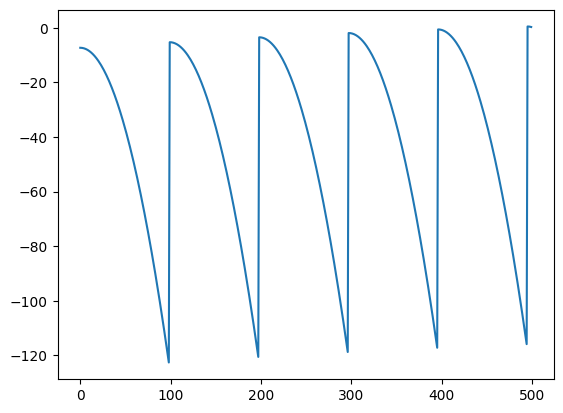

In [2]:
def find_maximum_grid():
    x_axis = []
    y_axis = []
    trials = 0
    for toast_duration in range(1, 100):
        for wait_duration in range(1, 100):
            x_axis.append(str((toast_duration, wait_duration)))
            y_axis.append(utility(toast_duration, wait_duration))
            trials += 1

    print("Iterations: ", trials)
    return x_axis, y_axis

pair, result = measure_time(find_maximum_grid)
limit = 500
g_max = max(result)
g_min = min(result)
print("global maximum", g_max, pair[result.index(g_max)])
print("global minimum", g_min, pair[result.index(g_min)])

plt.plot(result[:limit])
plt.show()

In [3]:
class Node:
    value: float
    coord: tuple
    step: int
    limit: int

    def __init__(self, coord, step=1, limit=100):
        self.coord = coord
        self.step = step
        self.limit = limit
        self.value = utility(*coord)

    def next(self):
        new_coords = [*self.coord]

        # If b is beneath the limit increase b.
        if self.coord[1] < self.limit:
            new_coords[1] = self.coord[1] + self.step
        # If b reached limit increase a (if under the limit) and reset b.
        elif self.coord[1] >= self.limit and self.coord[0] < self.limit:
            new_coords[0] = self.coord[0] + self.step
            new_coords[1] = 1

        return Node((new_coords[0], new_coords[1]), self.step)

    def prev(self):
        new_coords = [*self.coord]
        # If b is beneath the limit increase b.
        if self.coord[1] > 1:
            new_coords[1] = self.coord[1] - self.step
        # If b reached limit increase a (if under the limit) and reset b.
        elif self.coord[1] <= 1 and self.coord[0] > 1:
            new_coords[0] = self.coord[0] - self.step
            new_coords[1] = 1

        return Node((new_coords[0], new_coords[1]), self.step)

    def get_value(self):
        return self.value

    def at_lower_limit(self):
        if self.coord[0] <= 1 and self.coord[1] <= 1:
            return True
        return False

    def at_upper_limit(self):
        if self.coord[0] >= self.limit and self.coord[1] >= self.limit:
            return True
        return False

    def __str__(self):
        return f"coords: {self.coord}, value: {self.value}"


def find_maximum_hill_climb():
    current_node = Node((random.randint(1, 100), random.randint(1, 100)))
    # current_node = Node((1, 1), 1)
    print("Starting node", current_node)
    n_neighbors = 100

    def generate_n_neighbors(node: Node, n: int, dir: str):
        current = node.next() if dir == "next" else node.prev()
        neighbors = [current]
        for _ in range(0, n):
            current = current.next() if dir == "next" else current.prev()
            neighbors.append(current)

        return neighbors

    while True:
        current_node_util = current_node.get_value()

        if not current_node.at_lower_limit():
            candidates_prev = generate_n_neighbors(current_node, n_neighbors, "prev")
        else:
            candidates_prev = []

        if not current_node.at_upper_limit():
            candidates_next = generate_n_neighbors(current_node, n_neighbors, "next")
        else:
            candidates_next = []

        candidates = candidates_prev + candidates_next
        candidates_values = list(map(lambda n: n.get_value(), candidates))

        # print(list(map(lambda n: n.coord, candidates_prev)))
        # print(list(map(lambda n: n.coord, candidates_next)))
        # print(candidates_values)
        # plt.plot(list(map(lambda n:n.get_value(), candidates_next)))
        # plt.plot(list(map(lambda n:n.get_value(), candidates_prev)))
        # plt.show()

        best_neighbor = max(candidates_values)
        if best_neighbor > current_node_util:
            current_node = candidates[candidates_values.index(best_neighbor)]
        else:
            return current_node


result = measure_time(find_maximum_hill_climb)
print(result)

Starting node coords: (8, 73), value: -60.288
Elapsed time:  0.0013039112091064453
coords: (10, 1), value: 2.4
